Este conjunto de dados contém os dados de vendas de uma rede de cafeterias, com 3 lojas.

Contém o ID da transação de cada cliente e várias informações sobre cada pedido. Bom para estudar as vendas de um comércio.

Origem:

https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import statsmodels.formula.api as sm

In [4]:
df = pd.read_csv("/content/Project.csv")

Vamos começar com uma exploração do conteúdo do dataset

In [5]:
df.head(5)

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [6]:
#Para obter o número de linhas e colunas do df:
df.shape

(149116, 18)

In [7]:
#Para obter o nome das colunas e tipos de dados:
for coluna in df.columns: print(df[coluna].name, ", tipo = ", df[coluna].dtype, ", nulos = ", df[coluna].isnull().sum())

transaction_id , tipo =  int64 , nulos =  0
transaction_date , tipo =  object , nulos =  0
transaction_time , tipo =  object , nulos =  0
store_id , tipo =  int64 , nulos =  0
store_location , tipo =  object , nulos =  0
product_id , tipo =  int64 , nulos =  0
transaction_qty , tipo =  int64 , nulos =  0
unit_price , tipo =  float64 , nulos =  0
Total_Bill , tipo =  float64 , nulos =  0
product_category , tipo =  object , nulos =  0
product_type , tipo =  object , nulos =  0
product_detail , tipo =  object , nulos =  0
Size , tipo =  object , nulos =  0
Month Name , tipo =  object , nulos =  0
Day Name , tipo =  object , nulos =  0
Hour , tipo =  int64 , nulos =  0
Month , tipo =  int64 , nulos =  0
Day of Week , tipo =  int64 , nulos =  0


Outra forma (mais fácil de fazer):

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

Algumas observações:

o "transaction_id" embora seja um número, poderia ser um texto, uma vez que não devemos fazer operações matemáticas com o id. Porém é interessante verificar se esta coluna contém apenas valores únicos.

In [9]:
# Uma forma de verificar que não há valores duplicados
dd = df['transaction_id'].duplicated()
d = 0
for x in range(dd.shape[0]):
  if dd[x] == True:
    d = d+1
print("Valores repetidos = ", d)

Valores repetidos =  0


In [10]:
# Outra forma é verificar que a quantidade de valores unicos é igual ao número de linhas do dataframe
print("Valores únicos =", df['transaction_id'].nunique())
print("Número de linhas =", df.shape[0])

Valores únicos = 149116
Número de linhas = 149116


Feito isto, verificamos esta coluna contém valores unicos, assim podemos promover esta coluna ['transaction_id'] a índice:

In [11]:
df = df.set_index('transaction_id')

In [12]:
df.head(5)

,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
transaction_id,,,,,,,,,,,,,,,,,
114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


Note que desta forma o número de colunas diminui de 18 para  17:

In [13]:
df.shape

(149116, 17)

Mas o índice não é sempre crescente e nem decrescente:

In [14]:
df.index.is_monotonic_increasing

False

In [15]:
df.index.is_monotonic_decreasing

False

In [16]:
print(df.index.max())
print(df.index.min())
print(df.shape[0])

149456
1
149116


In [17]:
print(df.index.max() - df.index.min() - df.shape[0])
print((df.index.max() - df.index.min() - df.shape[0])/(df.index.max() - df.index.min()))

339
0.002268241276638453


Note que existe uma pequena parcela (0,2%) de ids possíveis no intervalo que não aparecem no dataframe.



Podemos organizar o dataframe por odem crescente do índice:

In [18]:
df = df.sort_index()

Fazendo o teste agora:

In [19]:
df.index.is_monotonic_increasing

True

Da mesma forma, o  "store_id" e o "product_id" embora sejam números, poderiam ser texto, dado que não devemos fazer operações matemáticas com o id. Porém, nestes casos eles se repetem em várias linhas, podemos usa-los para verificar transações por loja e transações por produto.

In [20]:
#Transações por loja
df['store_id'].value_counts()

store_id
8    50735
3    50599
5    47782
Name: count, dtype: int64

In [21]:
# se usermos .mode() vamos obter o id da loja com maior número de transações.
df['store_id'].mode()

0    8
Name: store_id, dtype: int64

In [22]:
#Transações por produto
df['product_id'].value_counts()

product_id
71    3076
50    3053
59    3029
54    3026
29    3013
      ... 
7      146
14     142
10     134
18     122
19     118
Name: count, Length: 80, dtype: int64

In [23]:
#Neste caso se usermos .mode() vamos obter o id do produto com maior número de transações.
df['product_id'].mode()

0    71
Name: product_id, dtype: int64

<Axes: >

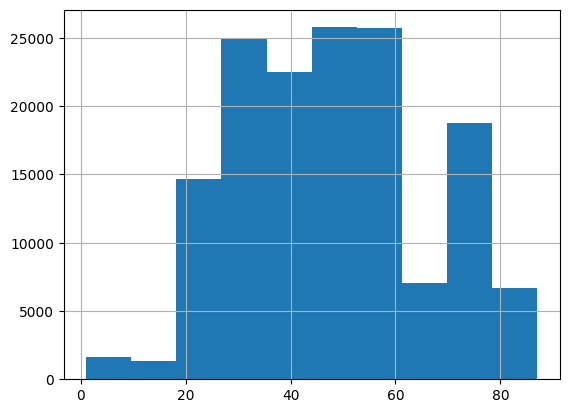

In [24]:
df['product_id'].hist()

Nota: O product id, apesar de ser um número, é considerado uma variável qualitativa nominal, assim a ordem dela no eixo x não tem significado, o gráfico acima mostra apenas que alguns produtos vendem muito mais do que outros.

In [25]:
df.index

Index([     1,      2,      3,      4,      5,      6,      7,      8,      9,
           10,
       ...
       149447, 149448, 149449, 149450, 149451, 149452, 149453, 149454, 149455,
       149456],
      dtype='int64', name='transaction_id', length=149116)

Os dados na coluna 'transaction_date' estão como objetos, podemos converto-los para o tipo datetime, que vai facilitar obter uma descrição destes dados:

In [26]:
df['Data'] = pd.to_datetime(df['transaction_date'], format=('%d-%m-%Y'))

In [27]:
df['Data'] = pd.to_datetime(df['Data'], format=('%d-%m-%Y %H:%M:%S'))

In [28]:
df.head(5)

,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week,Data
transaction_id,,,,,,,,,,,,,,,,,,
1,01-01-2023,07:06:11,5,Lower Manhattan,32,2,3.0,6.0,Coffee,Gourmet brewed coffee,Ethiopia,Regular,January,Sunday,7,1,6,2023-01-01
2,01-01-2023,07:08:56,5,Lower Manhattan,57,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6,2023-01-01
3,01-01-2023,07:14:04,5,Lower Manhattan,59,2,4.5,9.0,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,January,Sunday,7,1,6,2023-01-01
4,01-01-2023,07:20:24,5,Lower Manhattan,22,1,2.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,Small,January,Sunday,7,1,6,2023-01-01
5,01-01-2023,07:22:41,5,Lower Manhattan,57,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6,2023-01-01


Vamos comparar a coluna original com a nova coluna criada:

In [29]:
print(df['transaction_date'].dtype)

object


In [30]:
print(df['Data'].dtype)

datetime64[ns]


In [31]:
df['transaction_date'].describe()

count         149116
unique           181
top       19-06-2023
freq            1343
Name: transaction_date, dtype: object

In [32]:
df["Data"].info()

<class 'pandas.core.series.Series'>
Index: 149116 entries, 1 to 149456
Series name: Data
Non-Null Count   Dtype         
--------------   -----         
149116 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.3 MB


Agora podemos usar o describe e obter mais informações:

In [33]:
df['Data'].describe()

count                           149116
mean     2023-04-15 11:50:32.173609984
min                2023-01-01 00:00:00
25%                2023-03-06 00:00:00
50%                2023-04-24 00:00:00
75%                2023-05-30 00:00:00
max                2023-06-30 00:00:00
Name: Data, dtype: object

Da mesma forma para  o campo 'transaction_time', mas usando o timedelta

In [34]:
df['Hora'] = pd.to_timedelta(df['transaction_time'])

In [35]:
df.head(5)

,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week,Data,Hora
transaction_id,,,,,,,,,,,,,,,,,,,
1,01-01-2023,07:06:11,5,Lower Manhattan,32,2,3.0,6.0,Coffee,Gourmet brewed coffee,Ethiopia,Regular,January,Sunday,7,1,6,2023-01-01,0 days 07:06:11
2,01-01-2023,07:08:56,5,Lower Manhattan,57,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6,2023-01-01,0 days 07:08:56
3,01-01-2023,07:14:04,5,Lower Manhattan,59,2,4.5,9.0,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,January,Sunday,7,1,6,2023-01-01,0 days 07:14:04
4,01-01-2023,07:20:24,5,Lower Manhattan,22,1,2.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,Small,January,Sunday,7,1,6,2023-01-01,0 days 07:20:24
5,01-01-2023,07:22:41,5,Lower Manhattan,57,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6,2023-01-01,0 days 07:22:41


In [36]:
print(df['transaction_time'].dtype)

object


In [37]:
print(df['Hora'].dtype)

timedelta64[ns]


In [38]:
df['transaction_time'].describe()

count       149116
unique       25762
top       09:31:15
freq            41
Name: transaction_time, dtype: object

In [39]:
df['Hora'].describe()

count                       149116
mean     0 days 12:14:15.815794415
std      0 days 03:45:57.901686173
min                0 days 06:00:00
25%         0 days 09:05:10.500000
50%                0 days 11:15:28
75%                0 days 15:25:57
max                0 days 20:59:32
Name: Hora, dtype: object

Para ver um histograma vamos usar, o problema neste caso é que a data fica em 1900.

In [40]:
df['Hora2'] = pd.to_datetime(df['transaction_time'], format=('%H:%M:%S'))

<Axes: >

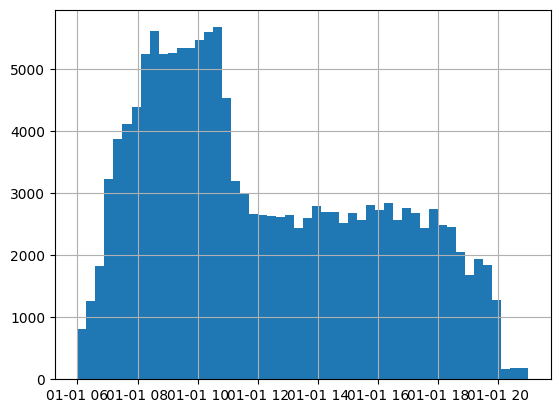

In [41]:
df['Hora2'].hist(bins=50)

Podemos notar que a distribuição de transações ao longo do dia não segue uma distribuição normal.

In [42]:
df.shape

(149116, 20)

In [43]:
df = df.drop('transaction_date', axis=1)
df = df.drop('transaction_time', axis=1)

In [44]:
df.shape

(149116, 18)

In [45]:
df.columns

Index(['store_id', 'store_location', 'product_id', 'transaction_qty',
       'unit_price', 'Total_Bill', 'product_category', 'product_type',
       'product_detail', 'Size', 'Month Name', 'Day Name', 'Hour', 'Month',
       'Day of Week', 'Data', 'Hora', 'Hora2'],
      dtype='object')

Vamos reordenar as colunas para facilitar a leitura:

In [46]:
nova_sequencia = ['Data', 'Hora', 'Hora2', 'Month', 'Month Name', 'Day of Week', 'Day Name', 'Hour',
        'store_id', 'store_location', 'product_id', 'product_category', 'product_type',
       'product_detail', 'Size', 'transaction_qty', 'unit_price', 'Total_Bill']

In [47]:
df = df[nova_sequencia]

In [48]:
df.head(5)

,Data,Hora,Hora2,Month,Month Name,Day of Week,Day Name,Hour,store_id,store_location,product_id,product_category,product_type,product_detail,Size,transaction_qty,unit_price,Total_Bill
transaction_id,,,,,,,,,,,,,,,,,,
1,2023-01-01,0 days 07:06:11,1900-01-01 07:06:11,1,January,6,Sunday,7,5,Lower Manhattan,32,Coffee,Gourmet brewed coffee,Ethiopia,Regular,2,3.0,6.0
2,2023-01-01,0 days 07:08:56,1900-01-01 07:08:56,1,January,6,Sunday,7,5,Lower Manhattan,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,2,3.1,6.2
3,2023-01-01,0 days 07:14:04,1900-01-01 07:14:04,1,January,6,Sunday,7,5,Lower Manhattan,59,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,2,4.5,9.0
4,2023-01-01,0 days 07:20:24,1900-01-01 07:20:24,1,January,6,Sunday,7,5,Lower Manhattan,22,Coffee,Drip coffee,Our Old Time Diner Blend,Small,1,2.0,2.0
5,2023-01-01,0 days 07:22:41,1900-01-01 07:22:41,1,January,6,Sunday,7,5,Lower Manhattan,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,2,3.1,6.2


In [49]:
df.tail(5)

,Data,Hora,Hora2,Month,Month Name,Day of Week,Day Name,Hour,store_id,store_location,product_id,product_category,product_type,product_detail,Size,transaction_qty,unit_price,Total_Bill
transaction_id,,,,,,,,,,,,,,,,,,
149452,2023-06-30,0 days 20:18:41,1900-01-01 20:18:41,6,June,4,Friday,20,8,Hell's Kitchen,44,Tea,Brewed herbal tea,Peppermint,Regular,2,2.50,5.00
149453,2023-06-30,0 days 20:25:10,1900-01-01 20:25:10,6,June,4,Friday,20,8,Hell's Kitchen,49,Tea,Brewed Black tea,English Breakfast,Large,2,3.00,6.00
149454,2023-06-30,0 days 20:31:34,1900-01-01 20:31:34,6,June,4,Friday,20,8,Hell's Kitchen,45,Tea,Brewed herbal tea,Peppermint,Large,1,3.00,3.00
149455,2023-06-30,0 days 20:57:19,1900-01-01 20:57:19,6,June,4,Friday,20,8,Hell's Kitchen,40,Coffee,Barista Espresso,Cappuccino,Not Defined,1,3.75,3.75
149456,2023-06-30,0 days 20:57:19,1900-01-01 20:57:19,6,June,4,Friday,20,8,Hell's Kitchen,64,Flavours,Regular syrup,Hazelnut syrup,Not Defined,2,0.80,1.60


Agora vamos verificar algumas das colunas com campos numéricos:

In [50]:
df['Total_Bill'].describe()

count    149116.000000
mean          4.686367
std           4.227099
min           0.800000
25%           3.000000
50%           3.750000
75%           6.000000
max         360.000000
Name: Total_Bill, dtype: float64

<Axes: >

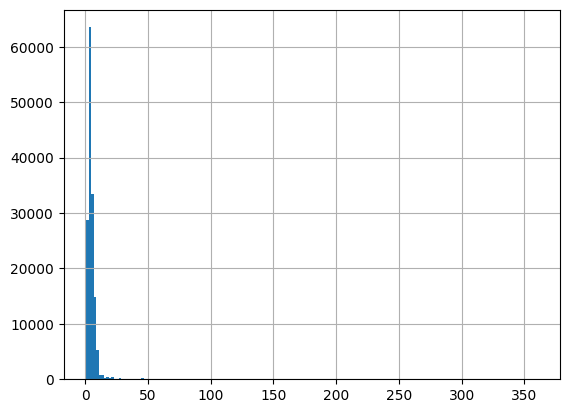

In [51]:
df['Total_Bill'].hist(bins=180)

<Axes: >

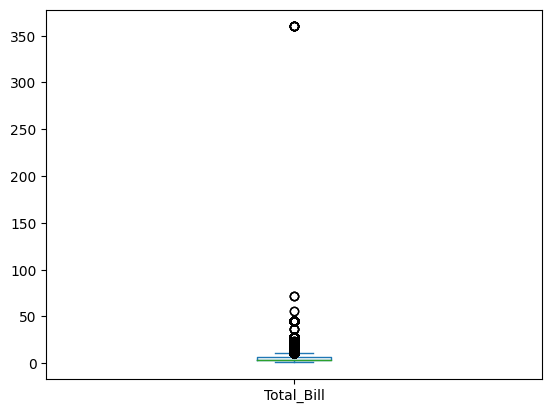

In [52]:
df['Total_Bill'].plot(kind='box')

Devido a existencia de outliers muito distantes da média, o box-plot acaba comprimido na parte infeiror da área gráfica.

<Axes: >

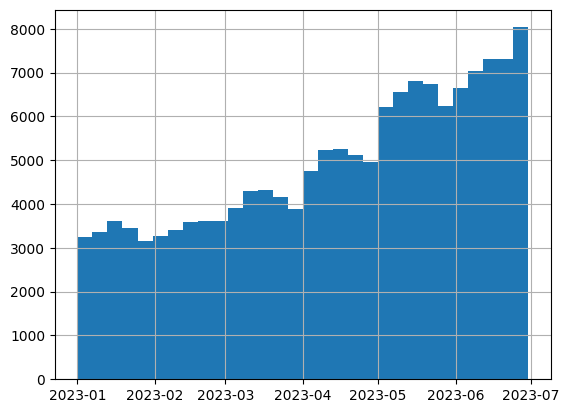

In [53]:
df['Data'].hist(bins=30)

Observando o gráfico notamos um crescimento no número de transações ao longo do mês.

In [54]:
df['transaction_qty'].describe()

count    149116.000000
mean          1.438276
std           0.542509
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: transaction_qty, dtype: float64

<Axes: >

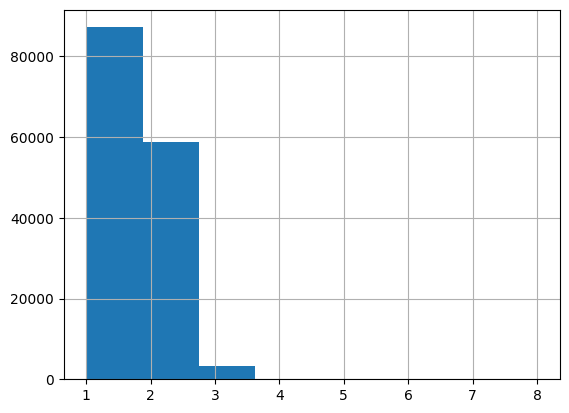

In [55]:
df['transaction_qty'].hist(bins=8)

Agora vamos ver algumas da variáveis categóricas:

In [56]:
categorias = df["product_category"].unique()

In [57]:
df["product_category"].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [58]:
df[df["product_category"]=="Coffee"].shape

(58416, 18)

<Axes: >

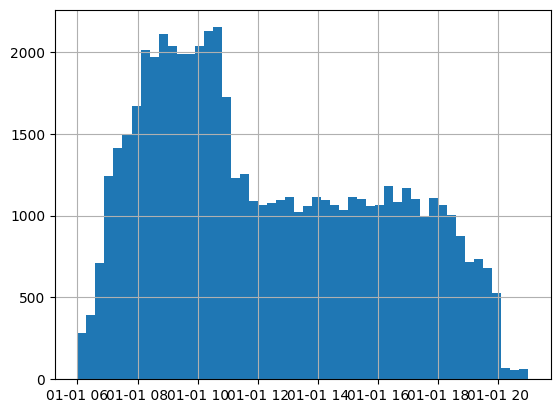

In [59]:
df_cof=df[df["product_category"]=="Coffee"]
df_cof['Hora2'].hist(bins=50)

<Axes: >

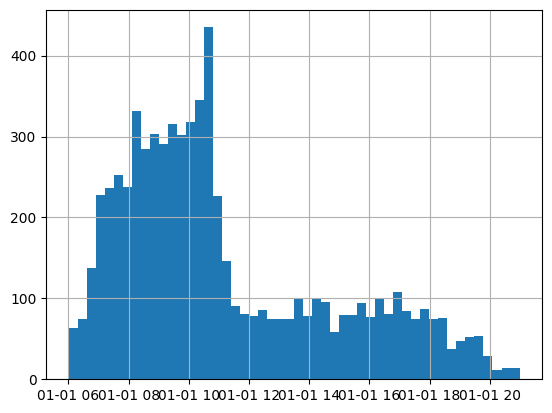

In [60]:
df_fla=df[df["product_category"]=="Flavours"]
df_fla['Hora2'].hist(bins=50)

Agora vamos começar a fazer algumas análises, começando com uma análise de tendencia. Neste caso o objetivo é verificar se existe uma tendencia de crescimento quando observamos a série temporal versus a quantidade de transaões (ou vendas).

In [61]:
# Separando pelo número de transações por dia:
vendas_diarias = df.groupby(df['Data']).size()

# Separando pelo número de transações por mes:
vendas_mensais = df.groupby(df['Month Name']).size().reindex(['January', 'February', 'March', 'April', 'May', 'June'])


In [62]:
# Definindo um estilo para os gráficos no sns:
sns.set_style("whitegrid")

In [63]:
# Definindo um estilo para os gráficos no sns:
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

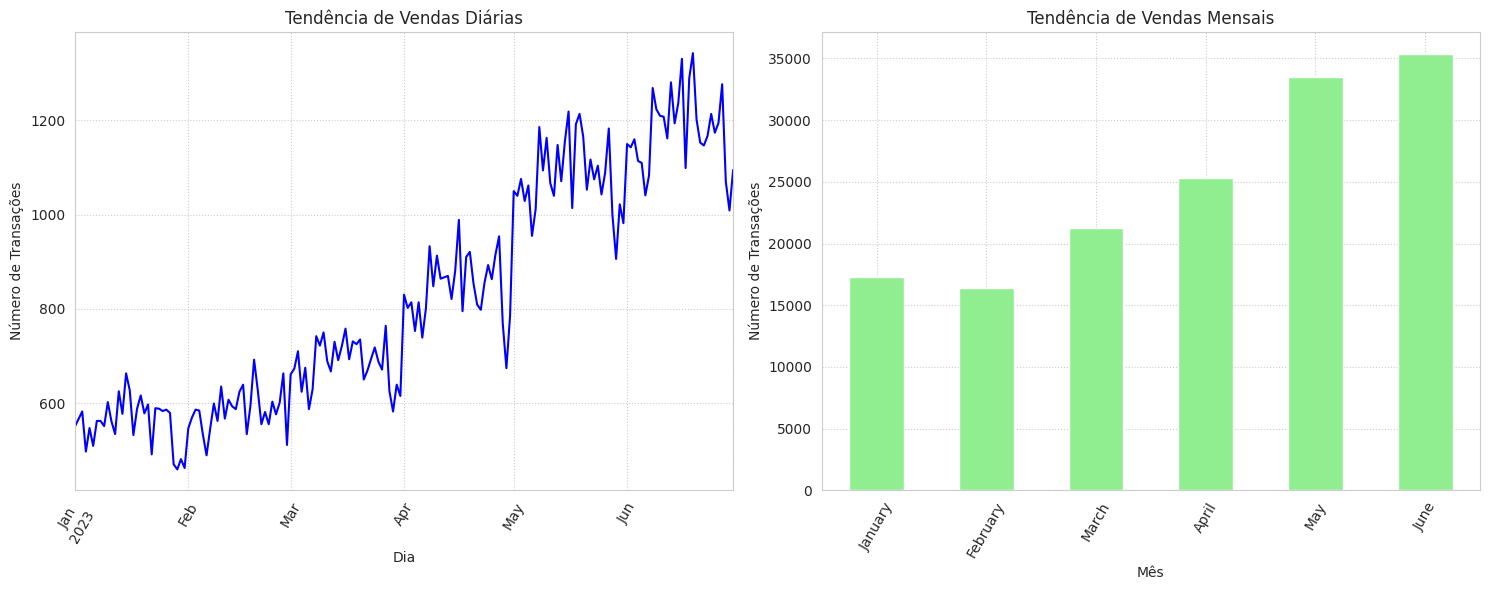

In [64]:
# Gráfico da tendência
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
vendas_diarias.plot(title='Tendência de Vendas Diárias', xlabel='Dia', ylabel='Número de Transações', color='blue')
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
vendas_mensais.plot(kind='bar', title='Tendência de Vendas Mensais', xlabel='Mês', ylabel='Número de Transações', color='lightgreen')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


Notas de uma simples observação dos gráficos:

Tendência de vendas diárias: o gráfico mostra o número de transações por dia. Existem flutuações nas vendas diárias, que podem ser influenciadas por fatores como dias de semana ou dias em fins de semana, feriados ou promoções especiais, mas com tendencia de crescimento.

Tendência de vendas mensais: o gráfico exibe contagem de transações por mês. Temos dados de seis meses, mostrando flutuações de atividade mas com tendencia de crescimento.

In [65]:
vendas_diarias.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-24',
               '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30'],
              dtype='datetime64[ns]', name='Data', length=181, freq=None)

In [66]:
vendas_diarias.values

array([ 550,  566,  582,  497,  547,  509,  562,  562,  551,  602,  561,
        534,  625,  577,  663,  627,  532,  588,  616,  578,  597,  491,
        589,  588,  583,  586,  579,  470,  459,  481,  462,  546,  569,
        586,  584,  533,  489,  546,  599,  562,  635,  567,  607,  593,
        587,  624,  639,  534,  594,  692,  628,  555,  581,  555,  603,
        576,  601,  663,  511,  661,  673,  710,  624,  675,  587,  629,
        742,  722,  750,  689,  667,  730,  691,  721,  758,  693,  731,
        725,  735,  650,  669,  694,  718,  688,  671,  764,  626,  582,
        639,  615,  830,  802,  814,  753,  814,  739,  802,  933,  848,
        913,  864,  867,  870,  821,  881,  989,  795,  910,  921,  854,
        809,  798,  855,  893,  863,  915,  954,  769,  674,  785, 1050,
       1040, 1076, 1029, 1062,  955, 1012, 1186, 1094, 1163, 1067, 1040,
       1148, 1071, 1156, 1219, 1014, 1192, 1214, 1166, 1053, 1117, 1075,
       1104, 1043, 1089, 1183,  999,  906, 1022,  9

In [70]:
df_vd = pd.DataFrame(vendas_diarias.values, index=vendas_diarias.index, columns=['Qtd'])

In [81]:
df_vd

,Qtd
Data,
2023-01-01,550
2023-01-02,566
2023-01-03,582
2023-01-04,497
2023-01-05,547
...,...
2023-06-26,1195
2023-06-27,1277
2023-06-28,1070


In [73]:
df_vd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2023-01-01 to 2023-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Qtd     181 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [85]:
df_vd['d']=df_vd.index.day_of_year

In [86]:
df_vd

,Qtd,d
Data,,
2023-01-01,550,1
2023-01-02,566,2
2023-01-03,582,3
2023-01-04,497,4
2023-01-05,547,5
...,...,...
2023-06-26,1195,177
2023-06-27,1277,178
2023-06-28,1070,179



#O Coeficiente de Correlação de Pearson.

Aplicação em casos com duas variáveis quantitativas contínuas que possuem uma relação linear.

Pode ser usado neste caso se considerarmos que a série de datas na forma de de número do dia do ano é uma variável quantitativa continua.

In [87]:
df_vd[['d', 'Qtd']].corr(method='pearson')

,d,Qtd
d,1.00000,0.92912
Qtd,0.92912,1.00000


Com este valor 0.929 confirmamos que exite uma forte correlação entre a sequência de dias e a quantidade de transações.

<Axes: >

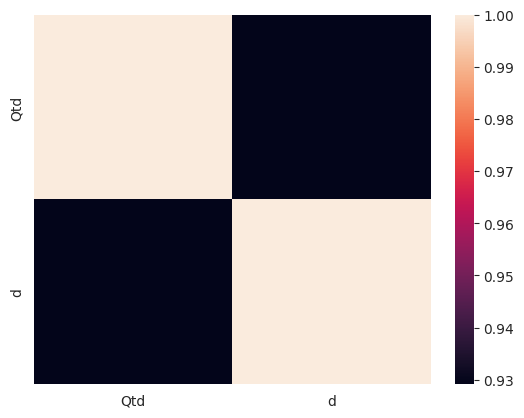

In [88]:
sns.heatmap(df_vd.corr())

#O Coeficiente de Correlação de Spearman

Aplicação em casos com

- duas variáveis quantitativas se a ligação for parcialmente linear,

- ou para uma variável ordinal qualitativa e uma variável quantitativa

Pode ser usado neste caso se considerarmos que a série de datas na forma de de número do dia do ano é uma variável ordinal qualitativa.

Para estes dados o valor é muito próximo do valor obtido pelo método de Pearson.

In [90]:
df_vd[['d', 'Qtd']].corr(method='spearman')

,d,Qtd
d,1.000000,0.932781
Qtd,0.932781,1.000000


#O Coeficiente de Correlação de Kendall

Frequentemente usado para duas variáveis ordinais qualitativas

Não é indicado para nosso caso, mas seria calculado da seguinte forma:

In [89]:
df_vd[['d', 'Qtd']].corr(method='kendall')

,d,Qtd
d,1.000000,0.764365
Qtd,0.764365,1.000000


Uma vez que temos uma boa correlação entre as variáveis, podemos fazer um ajuste de curva, vamos optar pelo método dos mínimos quadrados:

In [101]:

xdata = df_vd['d']
ydata = df_vd['Qtd']

In [102]:
xbar = np.mean(xdata) # cálculo da média de xdata
ybar = np.mean(ydata)  # cálculo da média de ydata


a = np.sum(xdata*(ydata-ybar))/np.sum(xdata*(xdata-xbar)) #coef. angular estimado
b = ybar - a*xbar #coeficiente linear estimado

In [103]:
yest = a*xdata + b # função estimada

R_squared = np.sum((yest-ybar)**2)/np.sum((ydata-ybar)**2) #coef. de determinação

print("R² é: ", np.round(R_squared,2))

R² é:  0.86


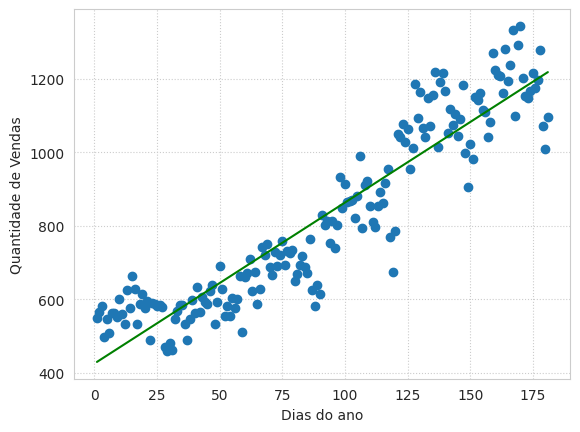

In [104]:
plt.figure()
plt.plot(xdata, yest, 'g', label = "fitted curve")
plt.scatter(xdata, ydata, label = "data")
plt.xlabel("Dias do ano")
plt.ylabel("Quantidade de Vendas")
plt.show()

To do: incluir as faixas de confiança 90 e 95% e projetar o valor para o próximo mês.